In [1]:
from matplotlib import pyplot as plt
import numpy as np

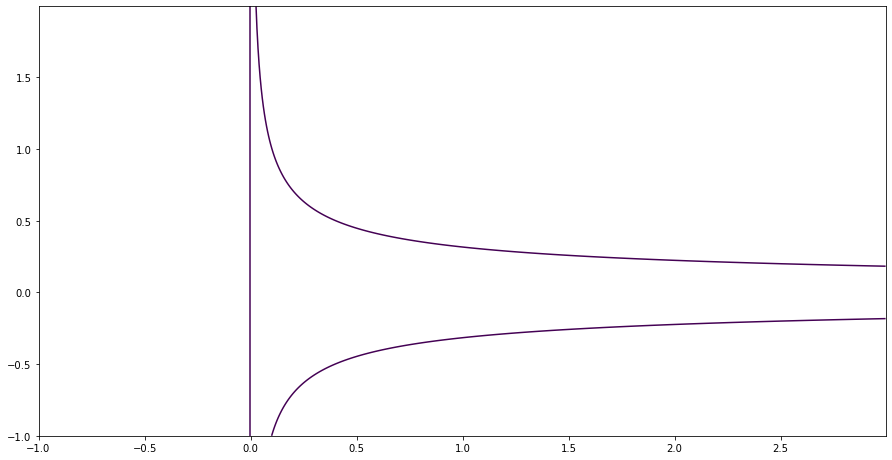

In [60]:
plt.rcParams["figure.figsize"] = [12.50, 6.50]
plt.rcParams["figure.autolayout"] = True
delta = 0.005
xrange = np.arange(-1.0, 3.0, delta)
yrange = np.arange(-1, 2.0, delta)
z = x/2
plt.plot(x, z, color='g', label='g_3')

x, y = np.meshgrid(xrange, yrange)
a, b = np.meshgrid(xrange, yrange)
equation = 25/(x*y)+3000/(x*y**2)-30000
#equation = a-b
plt.contour(x, y, equation, [0])

plt.show()

In [10]:
plt.rcParams["figure.figsize"] = [12.50, 6.50]


24

Text(0, 0.5, '$y$')

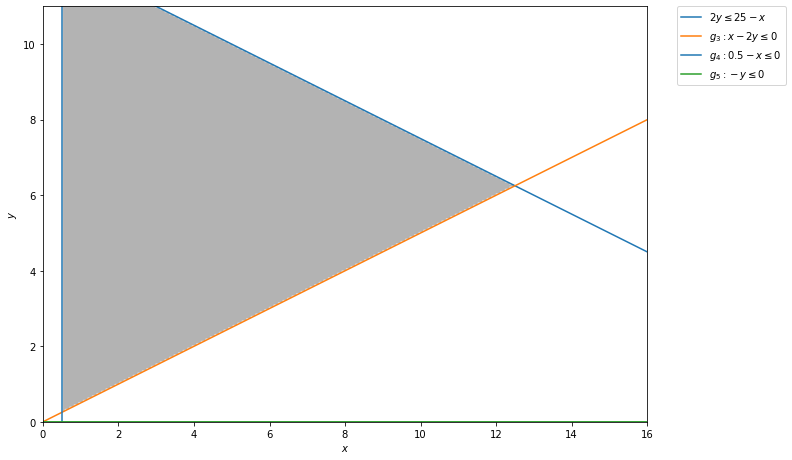

In [30]:
d = np.linspace(-2,16,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((2*y<=25-x) & (x-2*y<=0) & (0.5-x<=0) & (y>=0)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(0, 16, 2000)

# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = x/2
# y >= 0
y5 = (x*0) 

# Make plot
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$g_3:x-2y\leq0$')
plt.axvline(x=0.5, label=r'$g_4:0.5-x\leq0$')
plt.plot(x, y5, label=r'$g_5:-y\leq0$')

plt.xlim(0,16)
plt.ylim(0,11)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

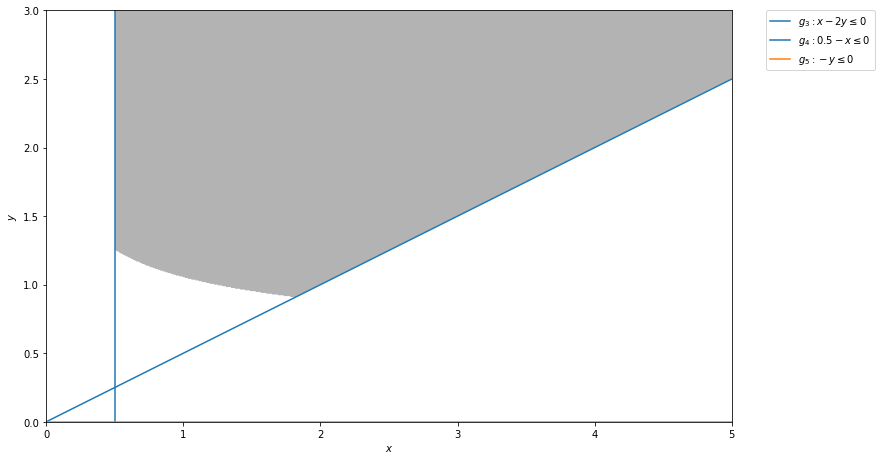

In [50]:
d = np.linspace(-2,16,3000)
x,y = np.meshgrid(d,d)
plt.imshow( ((25/(x*y)+3000/(x*y**2)-2467.4126*y**2<=0) & (25/(x*y)+3000/(x*y**2)<=30000)  
             & (x-2*y<=0) & (0.5-x<=0) & (y>=0)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(0, 16, 2000)

# y <= 0.3*x^2
y2 = 0.3*x**2
# 4y >= 2x - 8 
y3 = x/2
# y >= 0
y5 = (x*0) 

# Make plot
#plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$g_3:x-2y\leq0$')
plt.axvline(x=0.5, label=r'$g_4:0.5-x\leq0$')
plt.plot(x, y5, label=r'$g_5:-y\leq0$')

plt.xlim(0,5)
plt.ylim(0,3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

In [71]:
x = 0.5
y = 0.125
print(25/(x*y)+3000/(x*y**2))


384400.0


In [72]:
print(-2467.4126*y**2)

-38.553321875
